<a href="https://colab.research.google.com/github/lawgorithm/timeseries/blob/BM/Simulate_a_brownian_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def brownian_motion_with_params(n, dt, mu, sigma, x0):
  """Simulates a Brownian motion process with drift and volatility.

  Args:
    n: Number of time steps.
    dt: Time step size.
    mu: Drift parameter.
    sigma: Volatility parameter.
    x0: Initial value of the process.

  Returns:
    A numpy array representing the Brownian motion path.
  """

  # Generate random increments
  dW = np.random.normal(0, np.sqrt(dt), size=n)

  # Simulate the process
  X = np.zeros(n)
  X[0] = x0
  for i in range(1, n):
    X[i] = X[i-1] + mu * dt + sigma * dW[i]
  return X

In [3]:
def estimate_bm_parameters(data, dt):
  """Estimates the drift and volatility of a Brownian motion with drift.

  Args:
    data: A numpy array containing the time series data.
    dt: The time interval between observations.

  Returns:
    A tuple containing the estimated drift and volatility.
  """

  increments = np.diff(data) / dt
  drift = np.mean(increments)
  volatility = np.std(increments) * np.sqrt(dt)

  return drift, volatility

# Example simulation of BM without Drift

In [4]:
# Example usage
T = 1.0  # Total time
N = int(1e6)  # Number of steps
dt = T / N
mu = 0.0  # Drift
sigma = 0.5  # Volatility
x0 = 0.42  # Initial value

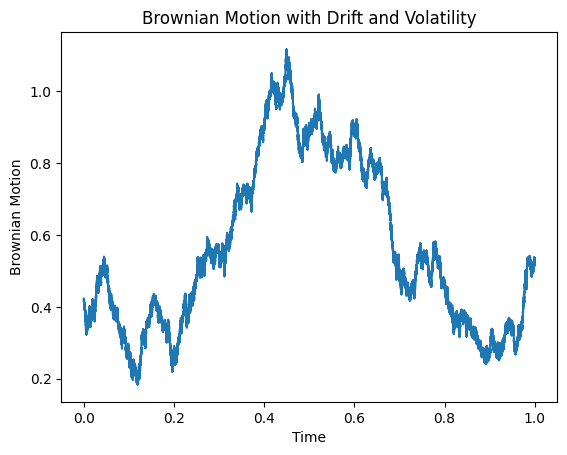

In [5]:
# Simulate the BM
X = brownian_motion_with_params(N, dt, mu, sigma, x0)

# Plot the Brownian motion
plt.plot(np.linspace(0, T, N), X)
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.title('Brownian Motion with Drift and Volatility')
plt.show()

# Maximum Likelihood for BM without Drift

Here is this model that corresponds to the BM without drift. It has a single parameter, $\sigma^2$:

$$X_i \mid X_{i-1} \sim N(X_{i-1}, \sigma^2 \Delta t)$$
$$Z_i := (X_i - X_{i-1})/\sqrt{\Delta t} \sim N(0, \sigma^2) $$

For a normal with known mean, the MLE for the variance is:

$$\hat{\sigma^2} = \sum_{i=1}^n (z_i - \mu)^2 / n$$

In this case, $\mu = 0$. I.e.:

$$\hat{\sigma^2} = \sum_{i=1}^n z_i ^2 / n$$


In [6]:
# Here we construct a dataset for manually computing the MLE, per the formula
# above

df = pd.DataFrame({
    'x' : X,
    'x_prev' : np.insert(X[:-1], 0, [0]),
    'dt': dt

})

# Remove the first row
df = df.iloc[1:]

# Transform
df['z'] = (df['x'] - df['x_prev']) / np.sqrt(df['dt'])

df.head()

,x,x_prev,dt,z
1,0.420123,0.420000,0.000001,0.122834
2,0.420644,0.420123,0.000001,0.520775
3,0.420751,0.420644,0.000001,0.107695
4,0.420223,0.420751,0.000001,-0.528128
5,0.419952,0.420223,0.000001,-0.271043


In [7]:
# Compute the MLE manually

sigma_sq_hat = np.sum(df['z']**2) / len(df)
sigma_hat = sigma_sq_hat**0.5

print(f'sigma = {sigma}')
print(f'sigma_hat = {sigma_hat}')

sigma = 0.5
sigma_hat = 0.5001962773706016


In [8]:
# Compare with the function above
estimate_bm_parameters(X, dt)

(0.1031417605438445, 0.5001962667365532)

# Brownian Motion With Drift

In [9]:
# Example usage
T = 100.0  # Total time
N = int(1e6)  # Number of steps
dt = T / N
mu = 0.3  # Drift
sigma = 0.1  # Volatility
x0 = 0.42  # Initial value

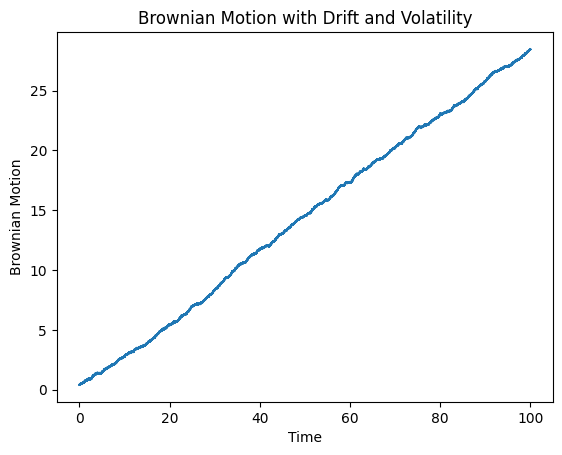

In [10]:
X_drift = brownian_motion_with_params(N, dt, mu, sigma, x0)

# Plot the Brownian motion
plt.plot(np.linspace(0, T, N), X_drift)
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.title('Brownian Motion with Drift and Volatility')
plt.show()

# Maximum Likelihood for BM without Drift

**Note: I suspect that estimates of the trend parameter can be quite noisy in practice**

Here is this model that corresponds to the BM without drift. It has a single parameter, $\sigma^2$:

$$X_i \mid X_{i-1} \sim N(X_{i-1} + \mu \Delta t, \sigma^2 \Delta t)$$
$$Z_i := (X_i - X_{i-1})/\sqrt{\Delta t} \sim N(\mu \sqrt{\Delta t}, \sigma^2) $$

For a normal with unknown mean, m, and variance, V, the MLE for (m, V) is:

$$\hat{m} = \bar{z} $$
$$\hat{V} = \sum_{i=1}^n (z_i - \bar{z})^2 / n$$

In this case, we have:

$$\hat{\mu} / \sqrt{\Delta t} = \bar{z}$$


In [11]:
# Here we construct a dataset for manually computing the MLE, per the formula
# above
df = pd.DataFrame({
    'x' : X_drift,
    'x_prev' : np.insert(X_drift[:-1], 0, [0]),
    'dt': dt

})
# Remove the first row
df = df.iloc[1:]

# Transform
df['z'] = (df['x'] - df['x_prev'])
df.head()

,x,x_prev,dt,z
1,0.420505,0.420000,0.0001,0.000505
2,0.422120,0.420505,0.0001,0.001615
3,0.423000,0.422120,0.0001,0.000880
4,0.423828,0.423000,0.0001,0.000828
5,0.425762,0.423828,0.0001,0.001934


In [12]:
# Compute the MLE manually

m_hat = np.mean(df['z'])
mu_hat = m_hat / dt
V_hat = np.sum((df['z'] - m_hat)**2) / len(df)
sigma_sq_hat = V_hat / dt
sigma_hat = sigma_sq_hat**0.5

print(f'mu = {mu}')
print(f'sigma = {sigma}')
print(f'mu_hat = {mu_hat}')
print(f'sigma_hat = {sigma_hat}')

mu = 0.3
sigma = 0.1
mu_hat = 0.28026938799510775
sigma_hat = 0.09991625206956502


In [13]:
# Compare with the function above
estimate_bm_parameters(X_drift, dt)

(0.28026938799510775, 0.099916252069565)